In [2]:
import tensorflow as tf
tf.__version__

!sudo pip3 install keras
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Loading DataSet

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls "/content/drive/My Drive"

Mounted at /content/gdrive
ls: cannot access '/content/drive/My Drive': Transport endpoint is not connected


In [4]:
img_dir = ('/content/gdrive/MyDrive/Colab Notebooks/SPT_2/DataSet/DataSet_1/')
no_tumour = os.listdir(img_dir+'no/')
yes_tumour = os.listdir(img_dir+'yes/')

dataset = []
label = []

## Converting Images into arrays

In [5]:
#loop over each image in each category

#for images labelled with no
for image_name in no_tumour:
    image=cv2.imread(img_dir + 'no/' +image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((64,64))
    dataset.append(np.array(image))
    label.append(0)
    
    
#for images labelled with yes
for image_name in yes_tumour:
    image=cv2.imread(img_dir+ 'yes/' +image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((64,64))
    dataset.append(np.array(image))
    label.append(1)
    

#convert dataset and label to numpy to array    
data=np.asarray(dataset)
l=np.asarray(label)

In [6]:
print(data.shape, l.shape)

(3000, 64, 64, 3) (3000,)


## Visualization

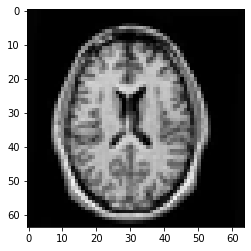

In [7]:
plt.imshow(data[1254])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, l, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)


(2400, 64, 64, 3)
(2400,)


In [9]:
print(X_test.shape)
print(y_test.shape)

(600, 64, 64, 3)
(600,)


# **Model training using CNN**

In [38]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3),  kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
#model.add(Dense(2))
model.add(Activation('sigmoid'))
# model.add(Activation('softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 activation_5 (Activation)   (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                  

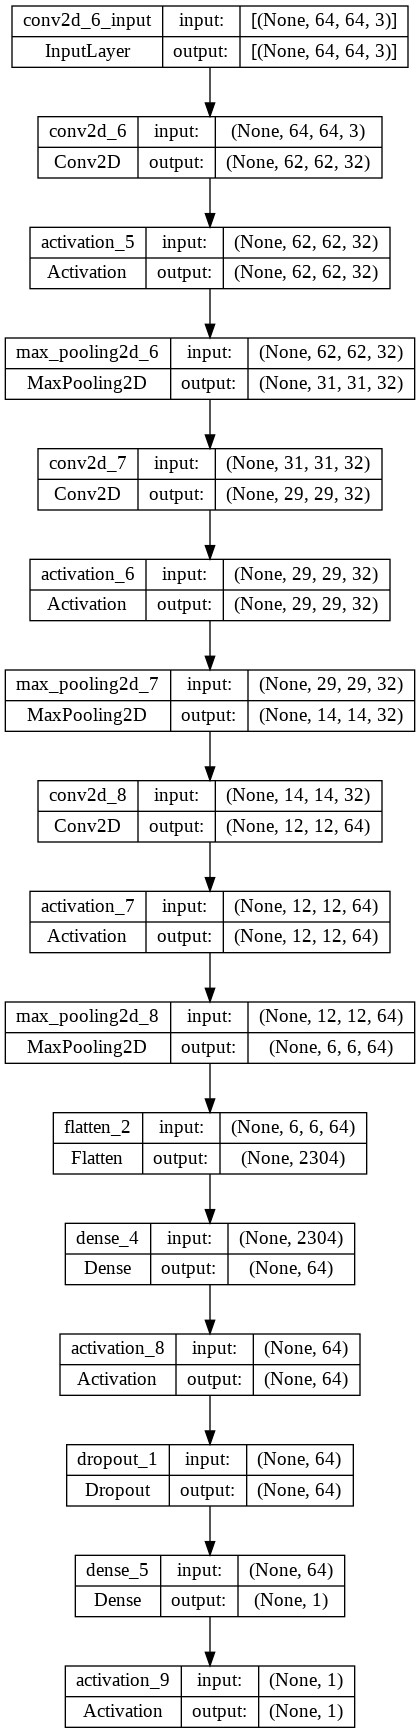

In [39]:
tf.keras.utils.plot_model(model,to_file="model.png",
                          show_shapes=True,
                          expand_nested=True)

In [40]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, 
batch_size = 16, 
verbose = 1, epochs = 10, 
validation_data = (X_test, y_test),
shuffle = 'False')

Epoch 1/10
150/150 [==============================] - 1s 6ms/step - loss: 3.0581 - accuracy: 0.6554 - val_loss: 0.5048 - val_accuracy: 0.7633
Epoch 2/10
150/150 [==============================] - 1s 5ms/step - loss: 0.5006 - accuracy: 0.7617 - val_loss: 0.4554 - val_accuracy: 0.8083
Epoch 3/10
150/150 [==============================] - 1s 5ms/step - loss: 0.4269 - accuracy: 0.8050 - val_loss: 0.3034 - val_accuracy: 0.8767
Epoch 4/10
150/150 [==============================] - 1s 5ms/step - loss: 0.3780 - accuracy: 0.8242 - val_loss: 0.2602 - val_accuracy: 0.8833
Epoch 5/10
150/150 [==============================] - 1s 5ms/step - loss: 0.3142 - accuracy: 0.8642 - val_loss: 0.3095 - val_accuracy: 0.8800
Epoch 6/10
150/150 [==============================] - 1s 5ms/step - loss: 0.2724 - accuracy: 0.8754 - val_loss: 0.1882 - val_accuracy: 0.9250
Epoch 7/10
150/150 [==============================] - 1s 5ms/step - loss: 0.2285 - accuracy: 0.8975 - val_loss: 0.1519 - val_accuracy: 0.9433
Epoch 

In [41]:
model.save('Brain_Tumor_detection.h5')

# Testing the model

In [42]:
import cv2
from keras.models import load_model 
from PIL import Image
import numpy as np

model = load_model('Brain_Tumor_detection.h5')

In [43]:
image = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/SPT_2/DataSet/DataSet_1/pred/pred0.jpg')  
img = Image.fromarray(image)
img = img.resize((64,64))
img = np.array(img)
print(img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [44]:
input_img = np.expand_dims(img, axis=0)

result = model.predict(input_img)
print(result)

1/1 [==============================] - 0s 74ms/step
[[0.04706407]]


In [45]:
image = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/SPT_2/DataSet/DataSet_1/pred/pred13.jpg')  
img = Image.fromarray(image)
img = img.resize((64,64))
img = np.array(img)
print(img)

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  1  1]
  [ 4  4  4]
  [ 4  4  4]
  ...
  [ 2  2  2]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 8  8  8]
  [22 22 22]
  [22 22 22]
  ...
  [11 11 11]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 8  8  8]
  [22 22 22]
  [22 22 22]
  ...
  [11 11 11]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 8  8  8]
  [22 22 22]
  [22 22 22]
  ...
  [10 10 10]
  [ 0  0  0]
  [ 0  0  0]]]


In [46]:
input_img = np.expand_dims(img, axis=0)

result = model.predict(input_img)
print(result)

1/1 [==============================] - 0s 19ms/step
[[0.9822811]]
